Data set: https://www.kaggle.com/datasets/hk7797/stock-market-india


In [ ]:
!pip install pmdarima

importing required libraries

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

loading and printing cleaned data set

In [ ]:
import pandas as pd

# Read the CSV file
stock_data = pd.read_csv('/content/tcs_clean_data.csv',nrows=100000, sep=',', index_col='timestamp', parse_dates=['timestamp'])

# Display the stock data
print(stock_data)


                              open     high      low    close   volume
timestamp                                                             
2017-01-02 09:15:00+05:30  1183.50  1185.50  1180.25  1183.50   8970.0
2017-01-02 09:16:00+05:30  1183.50  1184.50  1180.85  1182.48   5538.0
2017-01-02 09:17:00+05:30  1182.50  1182.50  1181.43  1181.68   1366.0
2017-01-02 09:18:00+05:30  1181.68  1185.80  1181.48  1185.80   1640.0
2017-01-02 09:19:00+05:30  1185.80  1185.80  1182.00  1183.25   3486.0
...                            ...      ...      ...      ...      ...
2018-01-30 09:20:00+05:30  1584.58  1593.00  1584.43  1593.00  31134.0
2018-01-30 09:21:00+05:30  1593.45  1594.33  1591.60  1593.30  21402.0
2018-01-30 09:22:00+05:30  1593.30  1601.90  1592.75  1597.75  56412.0
2018-01-30 09:23:00+05:30  1597.35  1598.48  1594.50  1596.50  17740.0
2018-01-30 09:24:00+05:30  1596.50  1599.43  1596.50  1598.68  13818.0

[100000 rows x 5 columns]


plotting data set

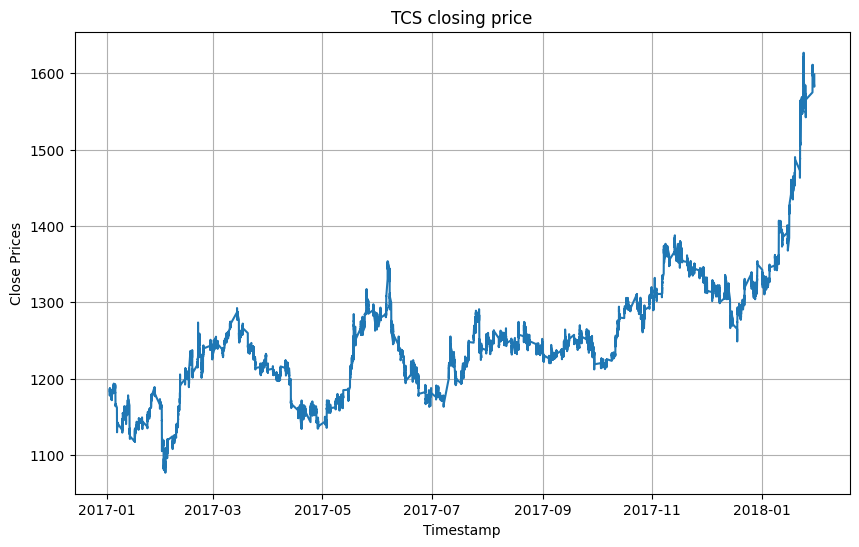

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Timestamp')
plt.ylabel('Close Prices')
plt.plot(stock_data['close'])
plt.title('TCS closing price')
plt.show()

ploting dencity of dataset

<Axes: ylabel='Density'>

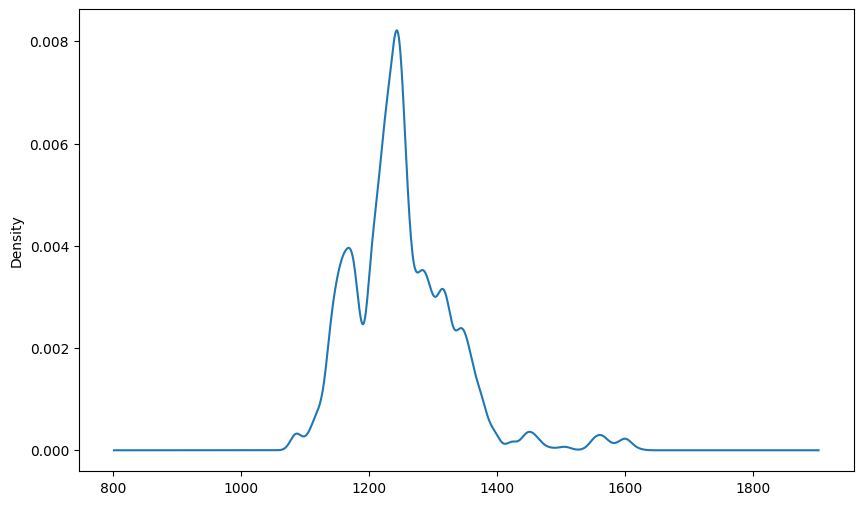

In [ ]:
#Distribution of the dataset
df_close = stock_data['close']
df_close.plot(kind='kde')

plotting roling mean, orignal mean and stsnderd daviation

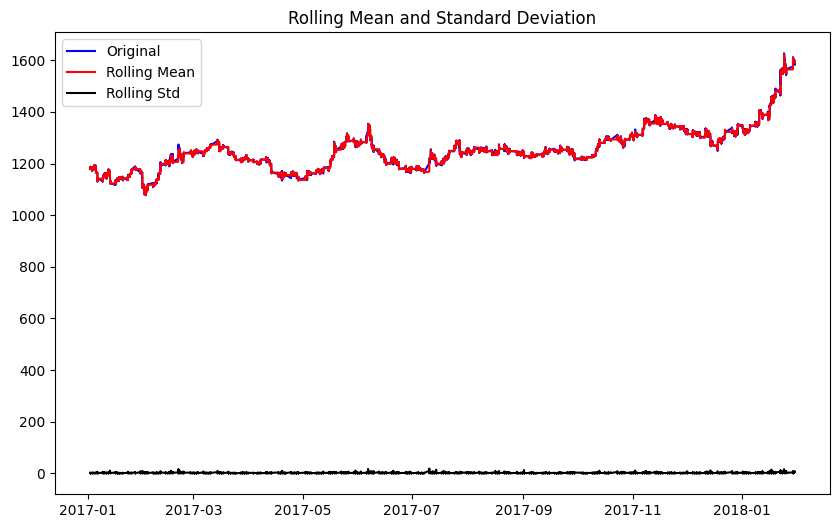

Results of dickey fuller test
Test Statistics                    1.123892
p-value                            0.995415
No. of lags used                   8.000000
Number of observations used    99991.000000
critical value (1%)               -3.430415
critical value (5%)               -2.861569
critical value (10%)              -2.566785
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

ploting moving avreage and standerd daviation

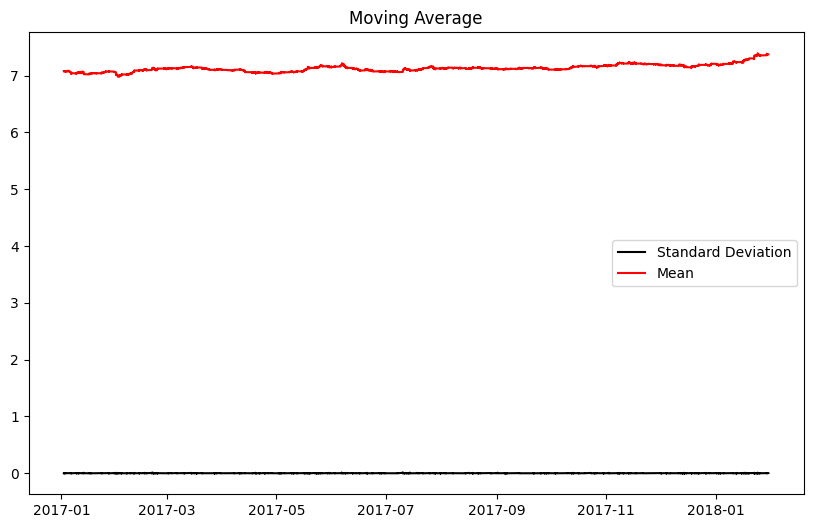

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

dataset divided into training and testing I have taken 90% training and 10% testing

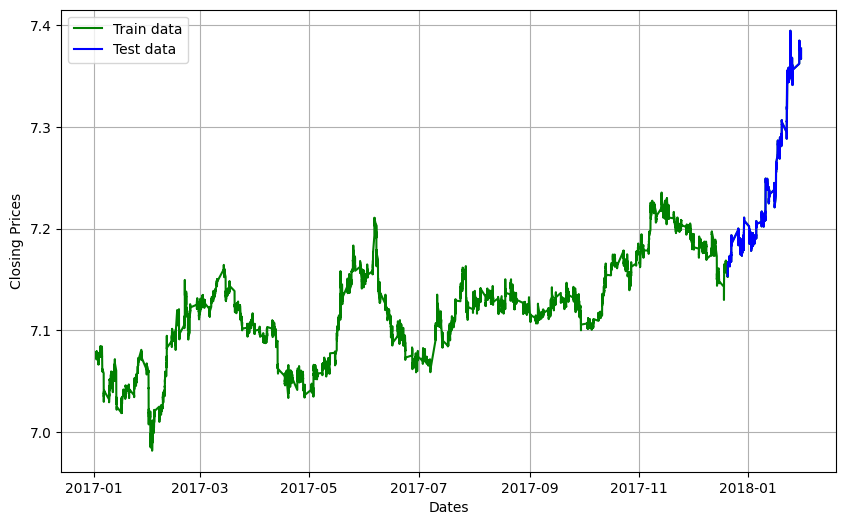

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

model calulating p,q,d value on its own and taking the best value out of all and ploting residual in fist graph difference between actual and presitive in 0.-- the ploting histogram puls here more green line in bell shame more accurate the data is noraml q-q and correlogram show how many point have high difference in actual and predected normal q-q is in 0. while correlogram shows how many point

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1054583.017, Time=12.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1054691.386, Time=22.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1054696.605, Time=21.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1054584.880, Time=4.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1054754.307, Time=40.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1054752.879, Time=87.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1054752.729, Time=89.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1054740.232, Time=25.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1054736.222, Time=23.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1054747.185, Time=62.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1054756.517, Time=23.83 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1054698.461, Time=11.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1054693.243, Time=6.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             

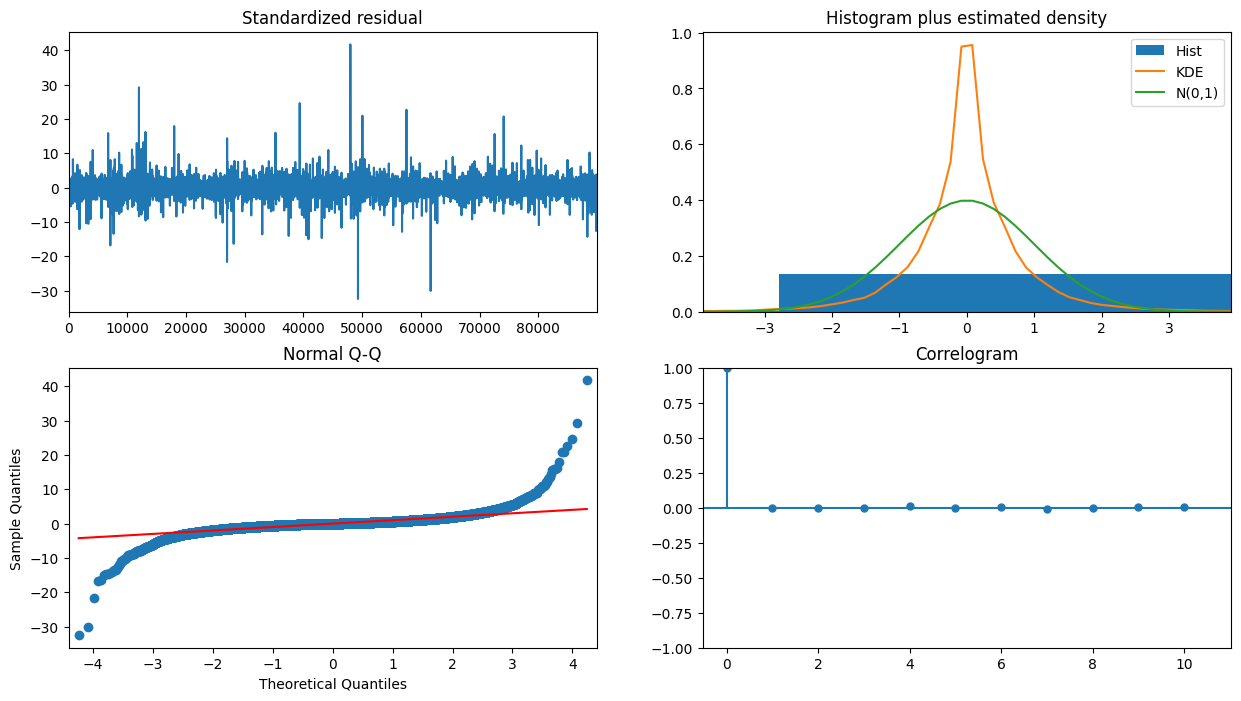

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

printing the trained model result

In [ ]:
# Import the updated ARIMA class
from statsmodels.tsa.arima.model import ARIMA

# Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,1))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                89997
Model:                 ARIMA(1, 1, 1)   Log Likelihood              527381.258
Date:                Thu, 04 Apr 2024   AIC                       -1054756.517
Time:                        13:21:15   BIC                       -1054728.294
Sample:                             0   HQIC                      -1054747.911
                              - 89997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6098      0.000   1290.069      0.000       0.609       0.611
ma.L1         -0.6459      0.000  -1325.784      0.000      -0.647      -0.645
sigma2      4.755e-07   3.16e-10   1506.537      0.0

ploting forcating and data here it is approximate saem so it one above another so forcasting is not visible

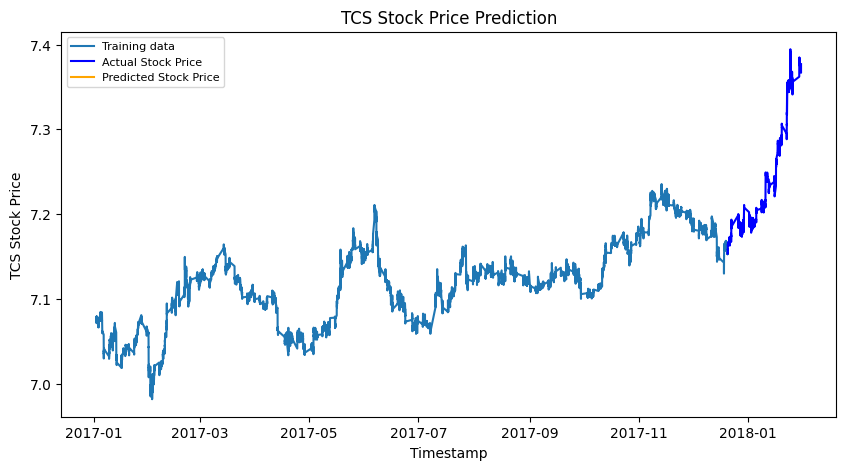

In [ ]:
# Forecast
fc = fitted.forecast(steps=321)  # Forecast 321 steps ahead

# Extract forecasted values
fc_series = pd.Series(fc, index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Timestamp')
plt.ylabel('TCS Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

printing MSE, MAE, RMSE, MAPE lower the value higher the accurcy from model here MAPE in nan because forcasting in in 0.

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.011649115488153252
MAE: 0.08624606293549096
RMSE: 0.10793106822483159
MAPE: nan


Taking input date to predict the value here taken as 2 feb 2024

In [ ]:
# Predict stock market value for a specific date
input_date = input("Enter the date for prediction (YYYY-MM-DD): ")  # User input
pred_date = pd.to_datetime(input_date)

# Forecast for the specified date
forecast = fitted.forecast(steps=2)  # Forecast for one step ahead
forecasted_price = np.exp(forecast.iloc[1])  # Exponentiate the result to get the actual price

print("Forecasted stock price for", input_date, ":", forecasted_price)


Enter the date for prediction (YYYY-MM-DD): 2024-02-02
Forecasted stock price for 2024-02-02 : 1279.0494950991308
